# Lorenz Equations

In [3]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation as FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import linregress

In [4]:

plt.ioff()

## Problem 1
Write a function that implements the Lorenz equations. Let $\sigma = 10$, $\rho = 28$, $\beta = 8$ . Make a 3D plot of a solution to the Lorenz equations for an initial condition where $(x, y, z)$ are drawn randomly from a uniform distribution from −15 to 15. As usual, use `scipy.integrate.solve_ivp` to compute the solution.

In [5]:
def lorenz(t, x):
    """Implements Lorenz equations:
    
    dx/dt = σ(y − x)
    dy/dt = ρx − y − xz
    dz/dt = xy − βz
        
    Parameters:
        t (float): The time value t
        x ((3,) ndarray): The state values (x,y,z)
    Returns:
        ((3,) ndarray): The derivative values
    """
    x, y, z = x
    return np.array([10 * (y - x), 28 * x - y - x * z, x * y - (8 / 3) * z])

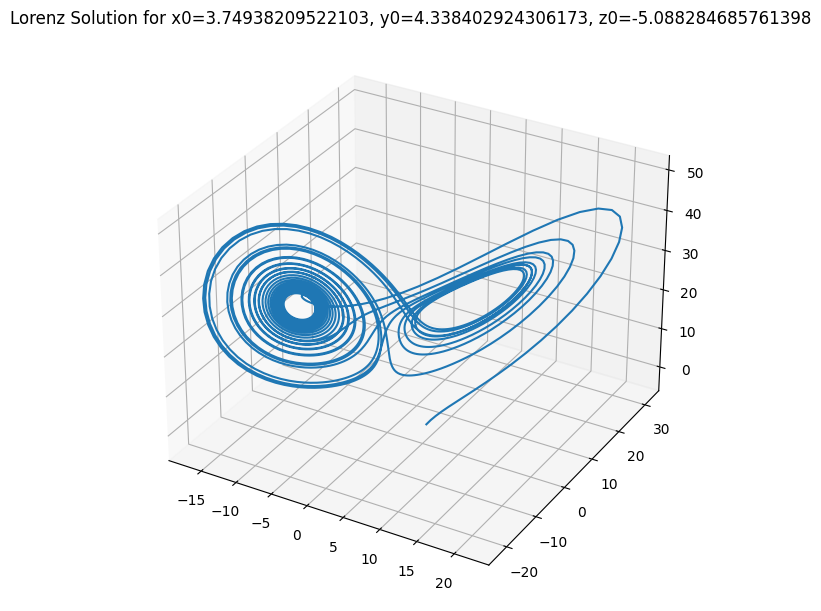

In [8]:
# initial conditions x0, y0, z0 are each drawn randomly from a uniform distribution on [−15, 15] and for t in the range [0, 25].
x0 = np.random.uniform(-15, 15)
y0 = np.random.uniform(-15, 15)
z0 = np.random.uniform(-15, 15)
t = (0, 25)

x = np.array([x0, y0, z0])
# Solve the Lorenz equations
# max_step is an optional parameter that controls maximum step size and
# a smaller value will result in a smoother graph
sol = solve_ivp(lorenz, t, x, max_step=0.01)
plt.subplots(figsize=(6, 6), constrained_layout=True)
ax = plt.subplot(111, projection='3d')

#plot in 3d, define titles as well
ax.plot(sol.y[0], sol.y[1], sol.y[2])
ax.set_title(f"Lorenz Solution for x0={x0}, y0={y0}, z0={z0}")
plt.show()

## Problem 2
To better visualize the Lorenz attractor, produce a single 3D plot displaying three solutions to the Lorenz equations, each with random initial conditions.

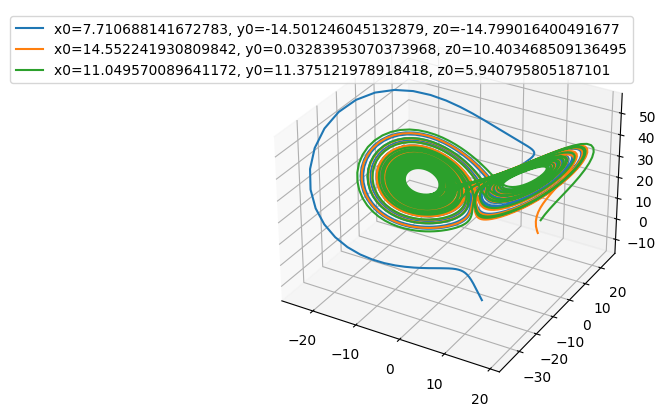

In [12]:
plt.subplots(figsize=(6, 6), constrained_layout=True)
ax = plt.subplot(111, projection='3d')
for _ in range(3):
    x0 = np.random.uniform(-15, 15)
    y0 = np.random.uniform(-15, 15)
    z0 = np.random.uniform(-15, 15)
    t = (0, 25)

    x = np.array([x0, y0, z0])
    # Solve the Lorenz equations
    # max_step is an optional parameter that controls maximum step size and
    # a smaller value will result in a smoother graph
    sol = solve_ivp(lorenz, t, x, max_step=0.01)

    #plot in 3d, define titles as well
    ax.plot3D(sol.y[0], sol.y[1], sol.y[2], label=f"x0={x0}, y0={y0}, z0={z0}")
plt.legend()
plt.show()

## Problem 3
Use `matplotlib.animation.FuncAnimation` to produce a 3D animation of two solutions to the Lorenz equations with similar initial conditions. To make similar initial conditions, draw $(x_1,y_1,z_1)$ randomly as before, and then produce $(x_2,y_2,z_2)$ by adding a small perturbation: `np.random.randn(3)*(1e-10)`. It will take several seconds before the separation between the two solutions will be noticeable.

The animation should have a point marker and the past trajectory curve for each solution. Save your animation as `lorenz_animation1.mp4`.

(Recall that you can display the saved animation in a Jupyter notebook by running the follwing code in a markdown cell):

`<video src='lorenz_animation1.mp4' controls>`

In [14]:
plt.ioff()
'''
Here we would insert whatever code needed to create the animation
such as instantiating the fig object and defining the update function
'''
'''Use matplotlib.animation.FuncAnimation to produce a 3D animation of two
solutions to the Lorenz equations with nearly identical initial conditions. To make the initial
conditions, draw x0, y0, z0 as before, and then make a second initial condition by adding a
small perturbation to the first (try using np.random.randn(3)*(1e-10) for the perturbation).
Note that it may take several seconds before the separation between the two solutions will be
noticeable.'''
#initial conditions
x0 = np.random.uniform(-15, 15)
y0 = np.random.uniform(-15, 15)
z0 = np.random.uniform(-15, 15)
t = (0, 50)

#perturb initial conditions


x = np.array([x0, y0, z0])
x_1 = x + np.random.randn(3) * (1e-10)

# Solve the Lorenz equations
# max_step is an optional parameter that controls maximum step size and
# a smaller value will result in a smoother graph
t_range = np.linspace(0, 50, 5000)
sol = solve_ivp(lorenz, t, x, t_eval= t_range)
sol_1 = solve_ivp(lorenz, t, x_1, t_eval= t_range)

#plot trajectory
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim((-25, 25))
ax.set_ylim((-25, 25))
ax.set_zlim((-25, 25))
particle, = plt.plot([],[], [], marker='o', color='r')
traj, = plt.plot([],[], [], color='r', alpha=0.5)

particle1, = plt.plot([],[], [], marker='o', color='orange')
traj1, = plt.plot([],[], [], color='purple', alpha=0.5)

#update function so that animation moves with time
def update(i):
    traj.set_data(sol.y[0, :i], sol.y[1, :i])
    particle.set_data([sol.y[0, i]], [sol.y[1, i]])

    # update z dimension
    traj.set_3d_properties(sol.y[2, :i])
    particle.set_3d_properties([sol.y[2, i]])

    # do the same for the second trajectory
    traj1.set_data(sol_1.y[0, :i], sol_1.y[1, :i])
    particle1.set_data([sol_1.y[0, i]], [sol_1.y[1, i]])

    # update z dimension
    traj1.set_3d_properties(sol_1.y[2, :i])
    particle1.set_3d_properties([sol_1.y[2, i]])
    return traj, particle, traj1, particle1

# create animation
ani = animation.FuncAnimation(fig, update, frames=range(5000), interval=25)
ani.save("lorenz_animation1.mp4")

<video src="lorenz_animation1.mp4" controls>

## Problem 4
The `solve_ivp` function allows users to specify error tolerances (similar to setting a value of $h$ for a Runge-Kutta method). Using a single random initial condition, produce two approximations by using the `solve_ivp` arguments `(atol=1e-15, rtol=1e-13)` for the first approximation and `(atol=1e-12, rtol=1e-10)` for the second.
As in the previous problem, use `FuncAnimation` to animate both solutions. Save the animation as `lorenz_animation2.mp4`.

In [16]:
#initial conditions
x0 = np.random.uniform(-15, 15)
y0 = np.random.uniform(-15, 15)
z0 = np.random.uniform(-15, 15)
t = (0, 50)

x = np.array([x0, y0, z0])

# Solve the Lorenz equations
# max_step is an optional parameter that controls maximum step size and
# a smaller value will result in a smoother graph
t_range = np.linspace(0, 50, 2000)
sol = solve_ivp(lorenz, t, x, t_eval= t_range, atol=1e-15, rtol=1e-13)
sol_1 = solve_ivp(lorenz, t, x_1, t_eval= t_range, atol=1e-12, rtol=1e-10)

#plot trajectory
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim((-25, 25))
ax.set_ylim((-25, 25))
ax.set_zlim((-25, 25))
particle, = plt.plot([],[], [], marker='o', color='purple')
traj, = plt.plot([],[], [], color='purple', alpha=0.5)

particle1, = plt.plot([],[], [], marker='o', color='orange')
traj1, = plt.plot([],[], [], color='orange', alpha=0.5)

#update function so that animation moves with time
def update(i):
    traj.set_data(sol.y[0, :i], sol.y[1, :i])
    particle.set_data([sol.y[0, i]], [sol.y[1, i]])

    # update z dimension
    traj.set_3d_properties(sol.y[2, :i])
    particle.set_3d_properties([sol.y[2, i]])

    # do the same for the second trajectory
    traj1.set_data(sol_1.y[0, :i], sol_1.y[1, :i])
    particle1.set_data([sol_1.y[0, i]], [sol_1.y[1, i]])

    # update z dimension
    traj1.set_3d_properties(sol_1.y[2, :i])
    particle1.set_3d_properties([sol_1.y[2, i]])
    return traj, particle, traj1, particle1

# create animation
ani = animation.FuncAnimation(fig, update, frames=range(2000), interval=25)
ani.save("lorenz_animation2.mp4")

<video src="lorenz_animation2.mp4" controls>

## Problem 5
Estimate the Lyapunov exponent of the Lorenz equations by doing the following:
* Produce an initial condition that already lies on the attractor. This can be done by using a random "dummy" initial condition, approximating the resulting solution to the Lorenz system for a short time, and then using the endpoint of that solution (which is now on the attractor) as the desired intital condition.
* Produce a second initial condition by adding a small perturbation to the first (as before).
* For both initial conditions, use `solve_ivp` to produce approximate solutions for $0 \leq t \leq 10$.
* Compute $||\delta(t)||$ by taking the norm of the vector difference between the two solutions for each value of $t$.
* Use `scipy.stats.linregress` to calculate a best-fit line for $\log(||\delta(t)||)$ against $t$.
* The slope of the resulting best-fit line is an approximation of the Lyapunov exponent $\lambda$.

Produce a plot similar to Figure 1.3 using `plt.semilogy`.

Hint: Remember that the best-fit line you calculated corresponds to a best-fit exponential for $||\delta(t)||$. If `a` and `b` are the slope and intercept of the best-fit line, the best-fit exponential can be plotted using `plt.semilogy(t,np.exp(a*t+b))`.

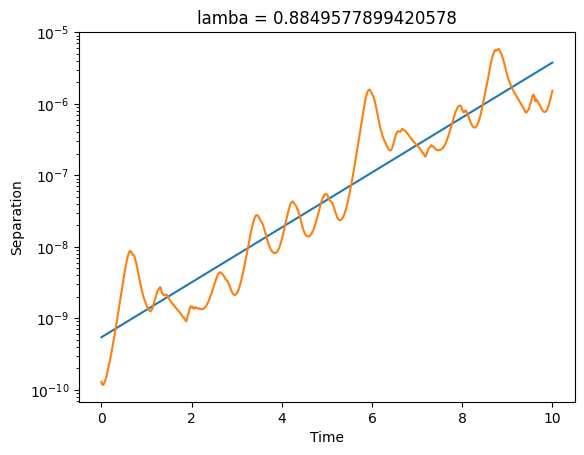

In [55]:
"""Produce an initial condition that already lies in the attractor. This can be done by using
a random "dummy" initial condition, approximating the resulting solution to the Lorenz
system for a short time, and then using the endpoint of that solution (which is now in
the attractor) as the desired initial condition."""
#initial conditions
x0 = np.random.uniform(-15, 15)
y0 = np.random.uniform(-15, 15)
z0 = np.random.uniform(-15, 15)
t = (0, 20)

x = np.array([x0, y0, z0])
sol = solve_ivp(lorenz, t, x, max_step=0.01)
range_t = np.linspace(0, 10, 1000)
x0 = sol.y[:, -1]

# perturb slightly
x0_1 = x0 + np.random.randn(3) * (1e-10)

t = (0, 10)

# solve the ivp with both initial conditions
sol_1 = solve_ivp(lorenz, t, x0, t_eval=range_t)
sol_2 = solve_ivp(lorenz, t, x0_1, t_eval=range_t)

delta = []
for i in range(1000):
    delta.append(np.linalg.norm(sol_1.y[:, i] - sol_2.y[:, i]))
best_fit = linregress(range_t, np.log(delta))
# print(best_fit)

a = best_fit[0]
b = best_fit[1]
plt.semilogy(range_t, np.exp(a*range_t+b))
logs = [np.log(t) for t in delta]
plt.semilogy(range_t, delta)
plt.ylabel("Separation")
plt.xlabel("Time")
plt.title(f"lamba = {a}")
plt.show()

